<a href="https://colab.research.google.com/github/juancuadrado/DOE_2023/blob/main/2_5__1_Colapsado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diseño $2^{5-1}$
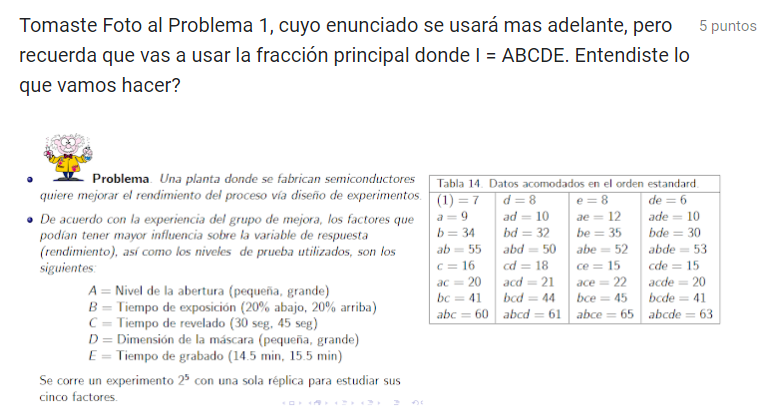


## **2. Librerias**

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import pandas as pd
import statsmodels.api as sm

## **3. Datos**

In [77]:
import pandas as pd

data = {
    'A': [ 1, -1, -1,  1,	-1,	 1,  1,	-1,	-1,	 1,	 1,	-1,	 1,	-1,	-1,	1],
    'B': [-1,  1, -1,  1,	-1,	 1, -1,	 1,	-1,	 1,	-1,	 1,	-1,	 1,	-1,	1],
    'C': [-1, -1,	 1,  1,	-1,	-1,  1,	 1,	-1,	-1,	 1,	 1,	-1,	-1,	 1,	1],
    'D': [-1, -1,	-1,	-1,	 1,	 1,  1,	 1,	-1,	-1,	-1,	-1,	 1,	 1,	 1,	1],
    'E': [-1, -1,	-1,	-1,	-1,	-1, -1,	-1,	 1,	 1,	 1,	 1,	 1,	 1,	 1,	1],
    'Rendimientos': [ 9,	34,	16,	60,	 8,	50,	21,	44,	8,	52,	22,	45,	10,	30,	15,	63]
}

data = pd.DataFrame(data)
data


,A,B,C,D,E,Rendimientos
0,1,-1,-1,-1,-1,9
1,-1,1,-1,-1,-1,34
2,-1,-1,1,-1,-1,16
3,1,1,1,-1,-1,60
4,-1,-1,-1,1,-1,8
5,1,1,-1,1,-1,50
6,1,-1,1,1,-1,21
7,-1,1,1,1,-1,44
8,-1,-1,-1,-1,1,8
9,1,1,-1,-1,1,52


## **4. Nuestro DataFrame**

In [78]:
datos = pd.DataFrame(data)
print(datos)


    A  B  C  D  E  Rendimientos
0   1 -1 -1 -1 -1             9
1  -1  1 -1 -1 -1            34
2  -1 -1  1 -1 -1            16
3   1  1  1 -1 -1            60
4  -1 -1 -1  1 -1             8
5   1  1 -1  1 -1            50
6   1 -1  1  1 -1            21
7  -1  1  1  1 -1            44
8  -1 -1 -1 -1  1             8
9   1  1 -1 -1  1            52
10  1 -1  1 -1  1            22
11 -1  1  1 -1  1            45
12  1 -1 -1  1  1            10
13 -1  1 -1  1  1            30
14 -1 -1  1  1  1            15
15  1  1  1  1  1            63


In [79]:
data['AB'] = data['A']*data['B']
data['AC'] = data['A']*data['C']
data['AD'] = data['A']*data['D']
data['AE'] = data['A']*data['E']
data['BC'] = data['B']*data['C']
data['BD'] = data['B']*data['D']
data['BE'] = data['B']*data['E']
data['CD'] = data['C']*data['D']
data['CE'] = data['C']*data['E']
data['DE'] = data['D']*data['E']


In [80]:
names =list(data.columns)
names.remove('Rendimientos')

for i in names:
  x =(data[data[i]==1]['Rendimientos'].sum()-data[~(data[i]==1)]['Rendimientos'].sum())/(2**3)
  print(i,x)

A 10.875
B 33.625
C 10.625
D -0.625
E 0.375
AB 7.125
AC 0.625
AD 0.875
AE 1.375
BC 0.875
BD -0.375
BE 0.125
CD 0.625
CE 0.625
DE -1.625


In [81]:
modelo1 = ols("Rendimientos ~ (A+B+C+D+E)**2", data = datos).fit()
anova_result = sm.stats.anova_lm(modelo1, typ=1)
print (anova_result)

           df        sum_sq    mean_sq    F  PR(>F)
A         1.0  4.730625e+02   473.0625  0.0     NaN
B         1.0  4.522562e+03  4522.5625  0.0     NaN
C         1.0  4.515625e+02   451.5625  0.0     NaN
D         1.0  1.562500e+00     1.5625  0.0     NaN
E         1.0  5.625000e-01     0.5625  0.0     NaN
A:B       1.0  2.030625e+02   203.0625  0.0     NaN
A:C       1.0  1.562500e+00     1.5625  0.0     NaN
A:D       1.0  3.062500e+00     3.0625  0.0     NaN
A:E       1.0  7.562500e+00     7.5625  0.0     NaN
B:C       1.0  3.062500e+00     3.0625  0.0     NaN
B:D       1.0  5.625000e-01     0.5625  0.0     NaN
B:E       1.0  6.250000e-02     0.0625  0.0     NaN
C:D       1.0  1.562500e+00     1.5625  0.0     NaN
C:E       1.0  1.562500e+00     1.5625  0.0     NaN
D:E       1.0  1.056250e+01    10.5625  0.0     NaN
Residual  0.0  4.796274e-27        inf  NaN     NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/anova.py:138: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


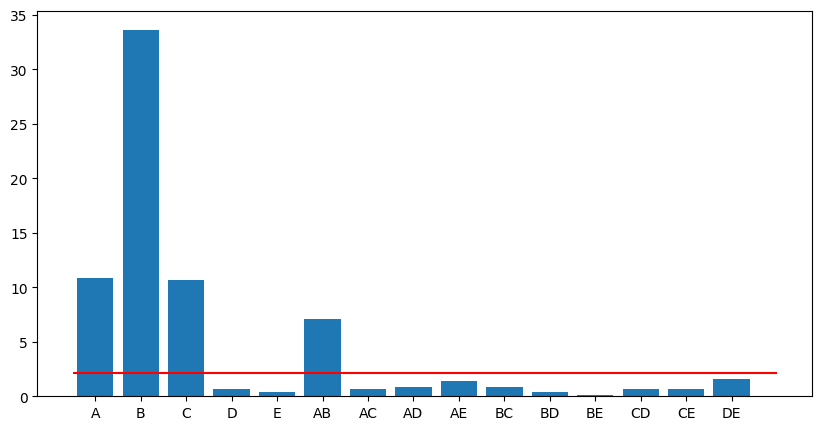

{'A': 10.875,
 'B': 33.625,
 'C': 10.625,
 'D': -0.625,
 'E': 0.375,
 'AB': 7.125,
 'AC': 0.625,
 'AD': 0.875,
 'AE': 1.375,
 'BC': 0.875,
 'BD': -0.375,
 'BE': 0.125,
 'CD': 0.625,
 'CE': 0.625,
 'DE': -1.625}

In [82]:
efectos = {}
for name in names:
  efecto = (data['Rendimientos'][data[name]==1].sum()-data['Rendimientos'][data[name]==-1].sum())/(2**3)
  efectos[name] = efecto

estimacion_estandar_error = (anova_result['mean_sq'].Residual/(2**2))**0.5

efecto_s = {}

for name in efectos.items():
  efecto_s[name[0]]=name[1]

bars = 2.1199053

#plt.plot(efecto_standarizado)

names = list(efecto_s.keys())
values = list(efecto_s.values())

values = [abs(result) for result in values]
plt.figure(figsize=(10,5))
plt.bar(range(len(efecto_s)), values, tick_label=names)
plt.hlines(xmin=-0.5, xmax=15, y = bars, color='red')
plt.show()
efecto_s

## **5. Grafico de los Efectos principales**


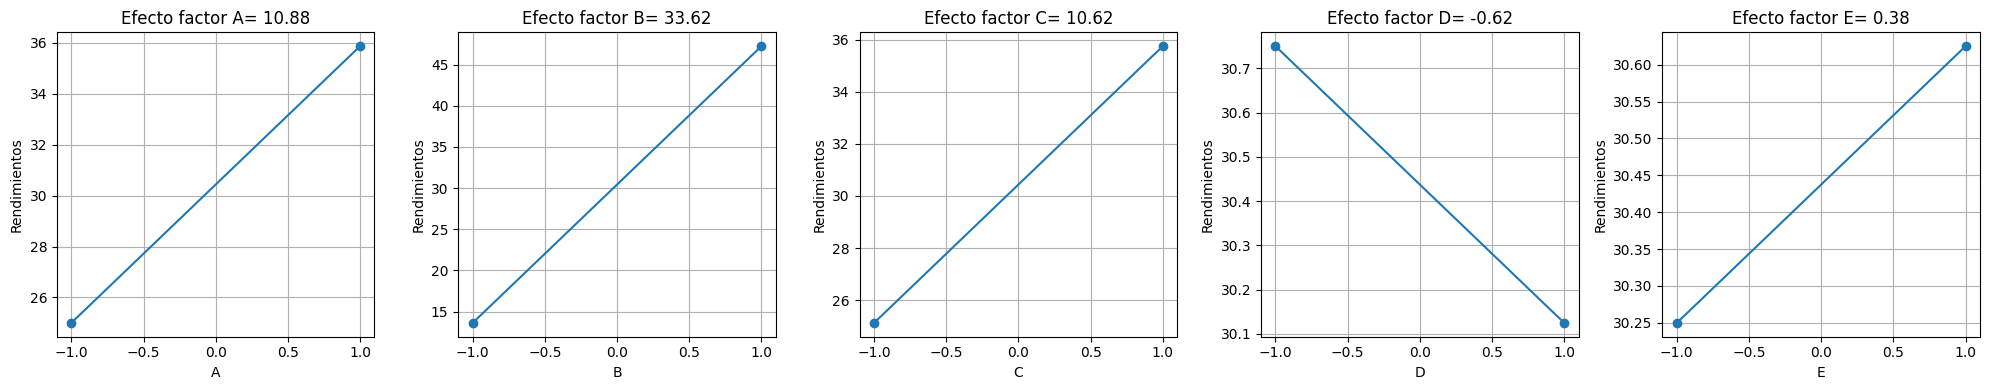

In [83]:
import matplotlib.pyplot as plt

factors = datos.columns[:5]  # Excluyendo la columna 'Rendimientos'

fig, axes = plt.subplots(1, len(factors), figsize=(20, 4))

for i, factor in enumerate(factors):
    df_effect = datos[[factor, 'Rendimientos']].groupby(factor).mean()
   # print(i, df_effect)
    effect_value = (df_effect.loc[1, 'Rendimientos'] - df_effect.loc[-1, 'Rendimientos'])  # Cálculo del efecto
    ax = axes[i]
    ax.plot(df_effect, marker='o')
    ax.set_xlabel(factor)
    ax.set_ylabel('Rendimientos')
    ax.set_title(f'Efecto factor {factor}= {effect_value:.2f}')
    ax.grid(True)

plt.tight_layout()
plt.show()


# **6. Box_PLot**

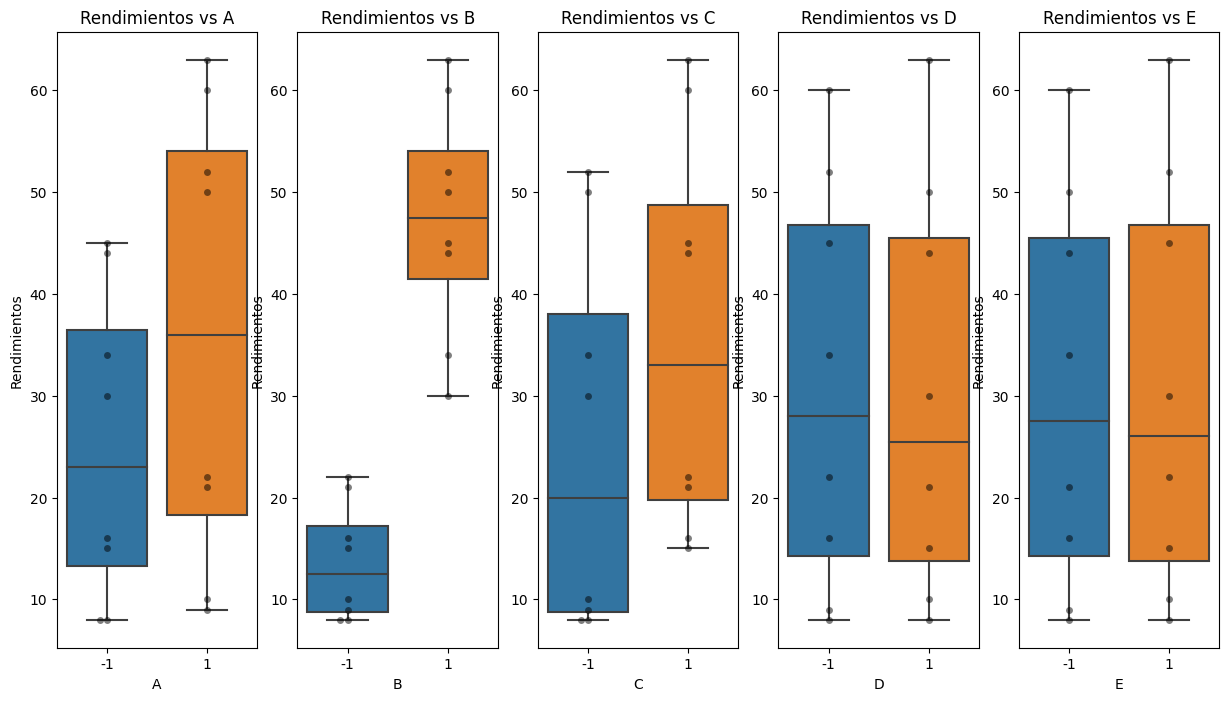

In [47]:
fig, axs = plt.subplots(1, 5, figsize=(15, 8))
axs[0].set_title('Rendimientos vs A')
sns.boxplot(x="A", y="Rendimientos", data=datos, ax=axs[0])
sns.swarmplot(x="A", y="Rendimientos", data=datos, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Rendimientos vs B')
sns.boxplot(x="B", y="Rendimientos", data=datos, ax=axs[1])
sns.swarmplot(x="B", y="Rendimientos", data=datos, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('Rendimientos vs C')
sns.boxplot(x="C", y="Rendimientos", data=datos, ax=axs[2])
sns.swarmplot(x="C", y="Rendimientos", data=datos, color='black',
              alpha = 0.5, ax=axs[2])

axs[3].set_title('Rendimientos vs D')
sns.boxplot(x="D", y="Rendimientos", data=datos, ax=axs[3])
sns.swarmplot(x="D", y="Rendimientos", data=datos, color='black',
              alpha = 0.5, ax=axs[3])
axs[4].set_title('Rendimientos vs E')
sns.boxplot(x="E", y="Rendimientos", data=datos, ax=axs[4])
sns.swarmplot(x="E", y="Rendimientos", data=datos, color='black',
              alpha = 0.5, ax=axs[4]);

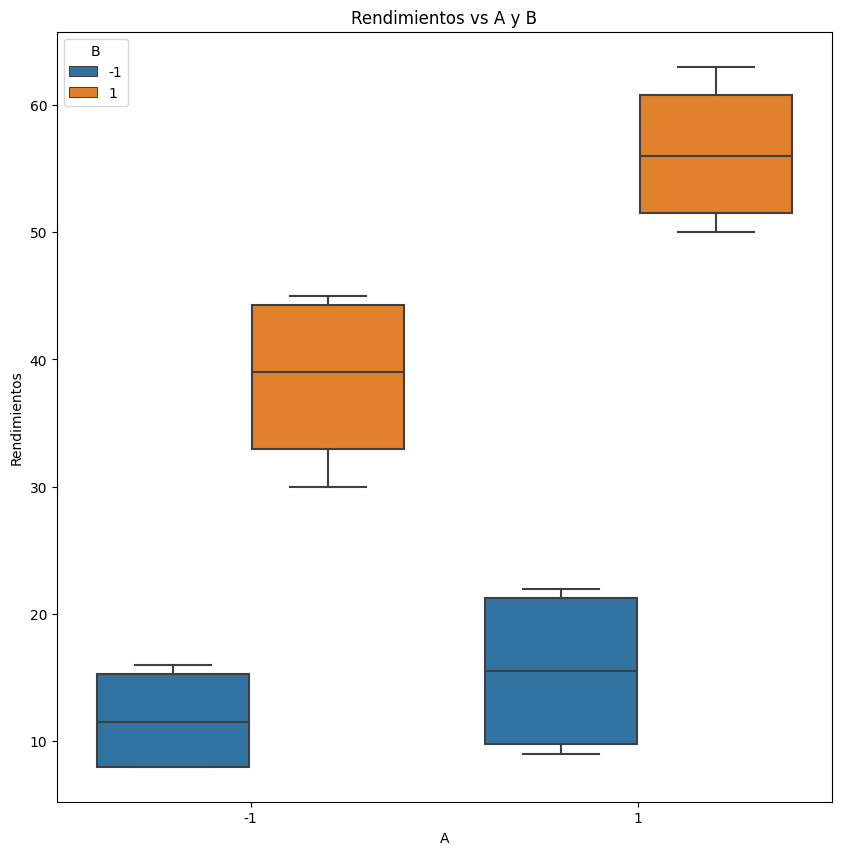

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Rendimientos vs A y B')
sns.boxplot(x="A", y="Rendimientos", hue='B', data=datos,
             ax=ax);

<Axes: title={'center': 'Rendimientos vs A y C'}, xlabel='A', ylabel='Rendimientos'>

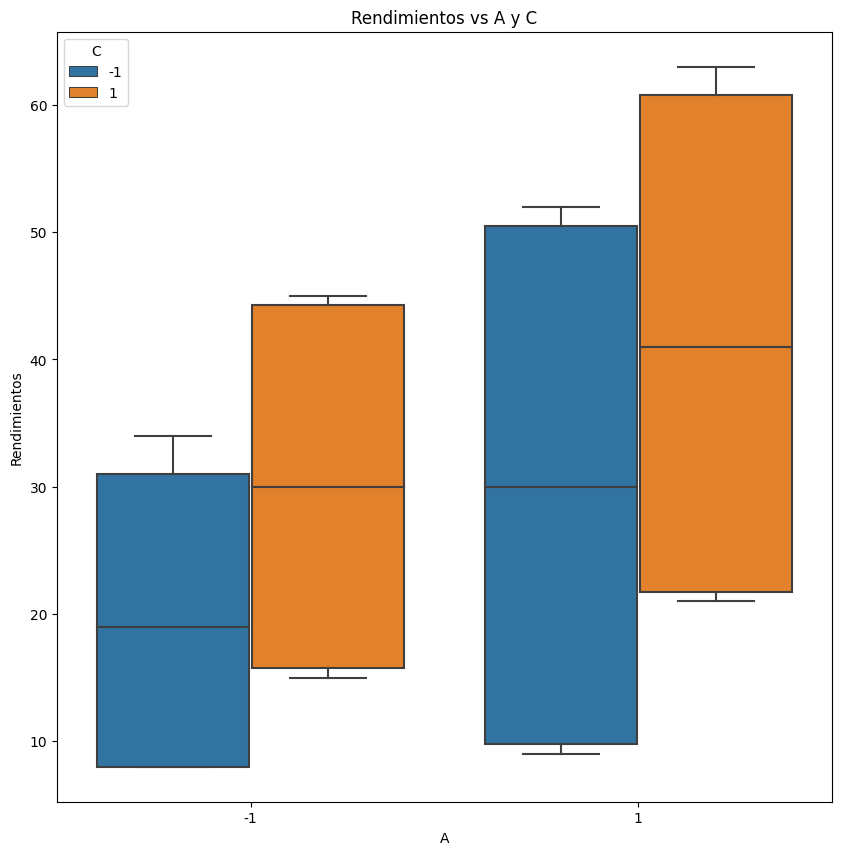

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Rendimientos vs A y C')
sns.boxplot(x="A", y="Rendimientos", hue='C',data=datos,               ax=ax)

# **7. Graficos de interacción**

In [50]:
from statsmodels.graphics.factorplots import interaction_plot

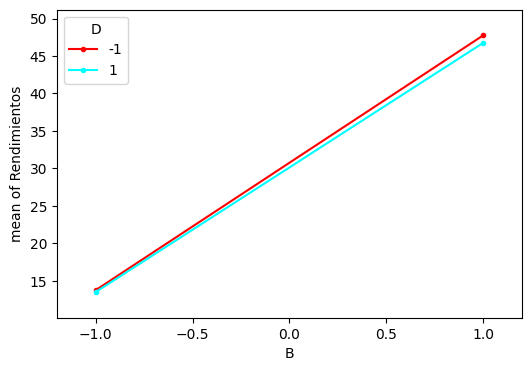

In [51]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.B,
    trace    = datos.D,
    response = datos.Rendimientos,
    ax       = ax,
)

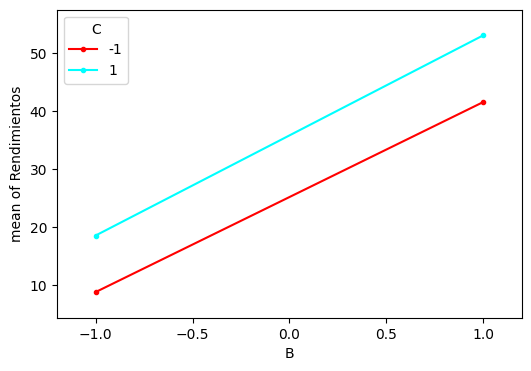

In [52]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.B,
    trace    = datos.C,
    response = datos.Rendimientos,
    ax       = ax,
)

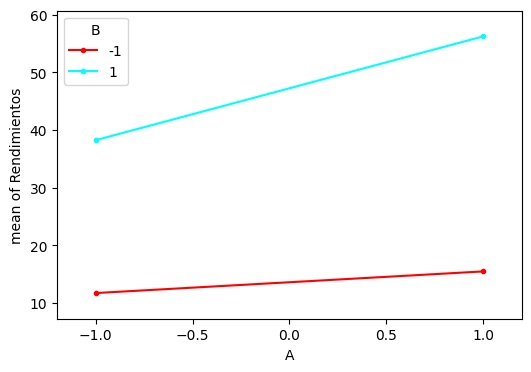

In [53]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.A,
    trace    = datos.B,
    response = datos.Rendimientos,
    ax       = ax,
)

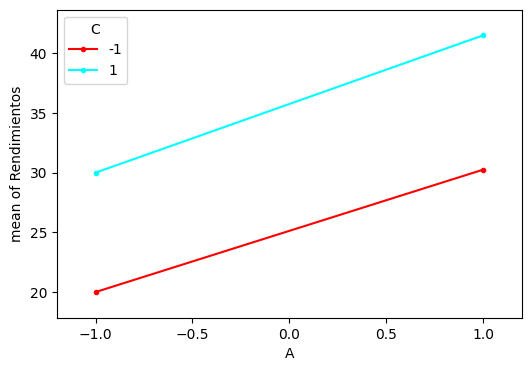

In [54]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.A,
    trace    = datos.C,
    response = datos.Rendimientos,
    ax       = ax,
)

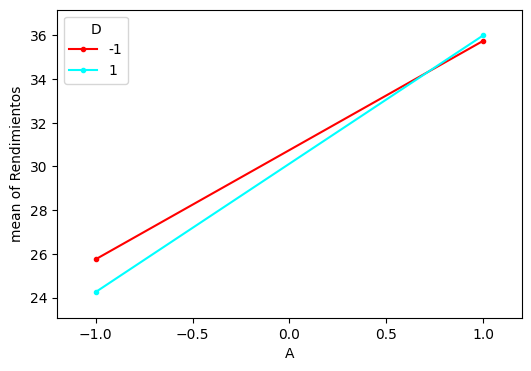

In [55]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.A,
    trace    = datos.D,
    response = datos.Rendimientos,
    ax       = ax,
)

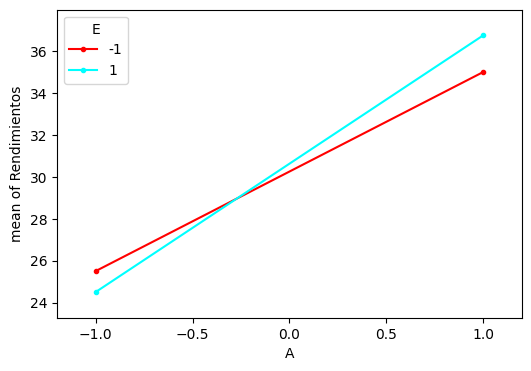

In [56]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.A,
    trace    = datos.E,
    response = datos.Rendimientos,
    ax       = ax,
)

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# **a. Anova con los Efectos Principales y las Interacciones Dobles**

In [58]:
modelo1 = ols("Rendimientos ~ (A+B+C+D+E)**2", data = datos).fit()
anova_result = sm.stats.anova_lm(modelo1, typ=1)
print (anova_result)

           df        sum_sq    mean_sq    F  PR(>F)
A         1.0  4.730625e+02   473.0625  0.0     NaN
B         1.0  4.522562e+03  4522.5625  0.0     NaN
C         1.0  4.515625e+02   451.5625  0.0     NaN
D         1.0  1.562500e+00     1.5625  0.0     NaN
E         1.0  5.625000e-01     0.5625  0.0     NaN
A:B       1.0  2.030625e+02   203.0625  0.0     NaN
A:C       1.0  1.562500e+00     1.5625  0.0     NaN
A:D       1.0  3.062500e+00     3.0625  0.0     NaN
A:E       1.0  7.562500e+00     7.5625  0.0     NaN
B:C       1.0  3.062500e+00     3.0625  0.0     NaN
B:D       1.0  5.625000e-01     0.5625  0.0     NaN
B:E       1.0  6.250000e-02     0.0625  0.0     NaN
C:D       1.0  1.562500e+00     1.5625  0.0     NaN
C:E       1.0  1.562500e+00     1.5625  0.0     NaN
D:E       1.0  1.056250e+01    10.5625  0.0     NaN
Residual  0.0  4.796274e-27        inf  NaN     NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/anova.py:138: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


In [59]:
!pip install texttable &>/dev/null
from texttable import Texttable

t1 = Texttable()
b0, A, B, C, D, E, AB, AC, AD, AE, BC, BD, BE, CD, CE, DE= modelo1.params
# Tabla Resumen

t1.add_rows([['Parametro = bi','valor de bi para el modelo 1' ],
           ['b0',	b0],
           ['A',	A ],
           ['B',	B ],
           ['C',	C ],
           ['D',	D ],
           ['E',	E ],
           ['AB',AB],
           ['AC',AC],
           ['AD',AD],
           ['AE',AE],
           ['BC',BC],
           ['BD',BD],
           ['BE',BE],
           ['CD',CD],
           ['CE',CE],
           ['DE',DE]
           ])
print(t1.draw())

+----------------+------------------------------+
| Parametro = bi | valor de bi para el modelo 1 |
+================+==============================+
| b0             | 30.438                       |
+----------------+------------------------------+
| A              | 5.437                        |
+----------------+------------------------------+
| B              | 16.812                       |
+----------------+------------------------------+
| C              | 5.312                        |
+----------------+------------------------------+
| D              | -0.312                       |
+----------------+------------------------------+
| E              | 0.187                        |
+----------------+------------------------------+
| AB             | 3.562                        |
+----------------+------------------------------+
| AC             | 0.313                        |
+----------------+------------------------------+
| AD             | 0.437                        |


In [60]:
from scipy.optimize import minimize
# Define la función que deseas maximizar se antepone el signo (-)
def funcion(x):
    return -(b0+A*x[0] + B*x[1] + C*x[2] + D*x[3] + E*x[4] + AB*x[0]*x[1] + AC*x[0]*x[2] + AD*x[0]*x[3]+ AE*x[0]*x[4]+ BC*x[1]*x[2]+ BD*x[1]*x[3]+ BE*x[1]*x[4] + CD*x[2]*x[3]+ CE*x[2]*x[4] + DE*x[3]*x[4])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2], x[3], x[4]

# Definir las restricciones de límite para x
restricciones = [(-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1)]

# Suprimir la Bida de la optimización
res = minimize(funcion, [0, 0, 0, 0, 0], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print("x:", [2*round(i)-1 for i in res.x])
print("Valor Máximo:", -res.fun)  # Como minimizamos el negativo de la función


Resultado óptimo:
x: [1, 1, 1, -1, 1]
Valor Máximo: 63.56249999763623


In [61]:
from scipy.optimize import minimize

# Define la función que deseas maximizar se antepone el signo (-)
def funcion(x):
    return (b0+ A*x[0] + B*x[1] + C*x[2] + D*x[3] + E*x[4] + AB*x[0]*x[1] + AC*x[0]*x[2] + AD*x[0]*x[3]+ AE*x[0]*x[4]+ BC*x[1]*x[2]+ BD*x[1]*x[3]+ BE*x[1]*x[4] + CD*x[2]*x[3]+ CE*x[2]*x[4] + DE*x[3]*x[4])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2], x[3], x[4]

# Definir las restricciones de límite para x
restricciones = [(-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1)]

# Suprimir la Bida de la optimización
res = minimize(funcion, [0, 0, 0, 0, 0], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print("x:", [2*round(i)-1 for i in res.x])
print("Valor Minimo:", res.fun)  # Como minimizamos el negativo de la función


Resultado óptimo:
x: [-1, -1, -1, 1, 1]
Valor Minimo: 29.500000000072827


In [62]:
modelo2 = sm.OLS.from_formula('Rendimientos ~ (A+B+C+D+E)**2', data=datos).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:           Rendimientos   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 19 Nov 2023   Prob (F-statistic):                nan
Time:                        22:11:52   Log-Likelihood:                 484.29
No. Observations:                  16   AIC:                            -936.6
Df Residuals:                       0   BIC:                            -924.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.4375        inf          0        n

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1529: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


# **9. El anova con todos los efectos - Colapsando el Factor E**

In [63]:
modelo3 = ols("Rendimientos ~ (A+B+C+D)**2", data = datos).fit()
anova_result = sm.stats.anova_lm(modelo3, typ=1)
print (anova_result)

           df     sum_sq    mean_sq            F        PR(>F)
A         1.0   473.0625   473.0625   116.446154  1.185330e-04
B         1.0  4522.5625  4522.5625  1113.246154  4.546269e-07
C         1.0   451.5625   451.5625   111.153846  1.325916e-04
D         1.0     1.5625     1.5625     0.384615  5.623123e-01
A:B       1.0   203.0625   203.0625    49.984615  8.756958e-04
A:C       1.0     1.5625     1.5625     0.384615  5.623123e-01
A:D       1.0     3.0625     3.0625     0.753846  4.249650e-01
B:C       1.0     3.0625     3.0625     0.753846  4.249650e-01
B:D       1.0     0.5625     0.5625     0.138462  7.250651e-01
C:D       1.0     1.5625     1.5625     0.384615  5.623123e-01
Residual  5.0    20.3125     4.0625          NaN           NaN


In [64]:
modelo3 = sm.OLS.from_formula('Rendimientos ~ (A+B+C+D)**2', data=datos).fit()
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:           Rendimientos   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     139.4
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.77e-05
Time:                        22:11:52   Log-Likelihood:                -24.612
No. Observations:                  16   AIC:                             71.22
Df Residuals:                       5   BIC:                             79.72
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.4375      0.504     60.405      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


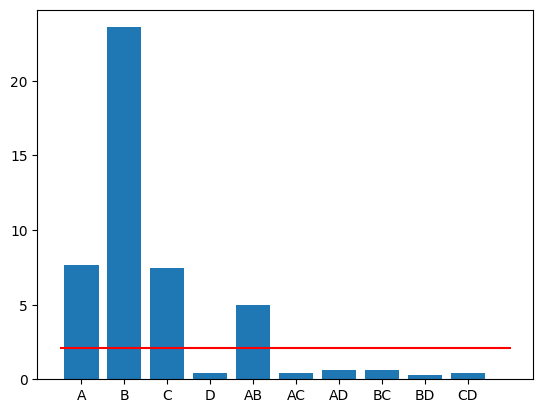

{'A': 7.6304047679711555,
 'B': 23.59286071935909,
 'C': 7.45499316410975,
 'D': -0.4385290096535147,
 'AB': 4.9992307100500675,
 'AC': 0.4385290096535147,
 'AD': 0.6139406135149206,
 'BC': 0.6139406135149206,
 'BD': -0.2631174057921088,
 'CD': 0.4385290096535147}

In [65]:
names = ['A','B','C','D','AB','AC','AD','BC','BD','CD']

efectos = {}
for name in names:
  efecto = (data['Rendimientos'][data[name]==1].sum()-data['Rendimientos'][data[name]==-1].sum())/(2**4)
  efectos[name] = efecto

estimacion_estandar_error = (anova_result['mean_sq'].Residual/(2**3))**0.5

efecto_standarizado = {}

for name in efectos.items():
  efecto_standarizado[name[0]]=name[1]/estimacion_estandar_error

bars = 2.1199053

#plt.plot(efecto_standarizado)

names = list(efecto_standarizado.keys())
values = list(efecto_standarizado.values())

values = [abs(result) for result in values]

plt.bar(range(len(efecto_standarizado)), values, tick_label=names)
plt.hlines(xmin=-0.5, xmax=10, y = bars, color='red')
plt.show()
efecto_standarizado

In [66]:
t1 = Texttable()
b0, A, B, C, D, AB, AC, AD, BC, BD, CD= modelo3.params
# Tabla Resumen

t1.add_rows([['Parametro = bi','valor de bi para el modelo 1' ],
           ['b0',	b0],
           ['A',	A ],
           ['B',	B],
           ['C',	C ],
           ['D',	D ],
           ['AB', AB],
           ['AC', AC],
           ['AD', AD],
           ['BC', BC],
           ['BD', BD],
           ['CD', CD],
           ])
print(t1.draw())

+----------------+------------------------------+
| Parametro = bi | valor de bi para el modelo 1 |
+================+==============================+
| b0             | 30.438                       |
+----------------+------------------------------+
| A              | 5.438                        |
+----------------+------------------------------+
| B              | 16.812                       |
+----------------+------------------------------+
| C              | 5.313                        |
+----------------+------------------------------+
| D              | -0.313                       |
+----------------+------------------------------+
| AB             | 3.562                        |
+----------------+------------------------------+
| AC             | 0.313                        |
+----------------+------------------------------+
| AD             | 0.437                        |
+----------------+------------------------------+
| BC             | 0.437                        |


In [67]:
from scipy.optimize import minimize
# Define la función que deseas maximizar se antepone el signo (-)
def funcion(x):
    return -(b0+A*x[0] + B*x[1] + C*x[2] + D*x[3] + AB*x[0]*x[1] + AC*x[0]*x[2] + AD*x[0]*x[3] + BC*x[1]*x[2] + BD*x[1]*x[3] + CD*x[2]*x[3])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2], x[3]

# Definir las restricciones de límite para x
restricciones = [(-1, 1), (-1, 1), (-1, 1), (-1, 1)]

# Suprimir la Bida de la optimización
res = minimize(funcion, [0, 0, 0, 0], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print("x:", [2*round(i)-1 for i in res.x])
print("Valor Máximo:", -res.fun)  # Como minimizamos el negativo de la función


Resultado óptimo:
x: [1, 1, 1, 1]
Valor Máximo: 62.56249999814879


In [68]:
from scipy.optimize import minimize
# Define la función que deseas maximizar se antepone el signo (-)
def funcion(x):
    return (b0+A*x[0] + B*x[1] + C*x[2] + D*x[3] + AB*x[0]*x[1] + AC*x[0]*x[2] + AD*x[0]*x[3] + BC*x[1]*x[2] + BD*x[1]*x[3] + CD*x[2]*x[3])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2], x[3]

# Definir las restricciones de límite para x
restricciones = [(-1, 1), (-1, 1), (-1, 1), (-1, 1)]

# Suprimir la Bida de la optimización
res = minimize(funcion, [0, 0, 0, 0], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print("x:", [2*round(i)-1 for i in res.x])
print("Valor Minimo:", res.fun)  # Como minimizamos el negativo de la función


Resultado óptimo:
x: [-1, -1, -1, 1]
Valor Minimo: 30.124999999994532


# **10. El anova con todos los efectos - Colapsando otro Factor - el Factor D**

In [69]:
modelo4 = ols("Rendimientos ~ (A+B+C)**2", data = datos).fit()
anova_result = sm.stats.anova_lm(modelo4, typ=1)
print (anova_result)

           df     sum_sq      mean_sq            F        PR(>F)
A         1.0   473.0625   473.062500   157.323326  5.277479e-07
B         1.0  4522.5625  4522.562500  1504.039261  2.503828e-11
C         1.0   451.5625   451.562500   150.173210  6.438050e-07
A:B       1.0   203.0625   203.062500    67.531178  1.784958e-05
A:C       1.0     1.5625     1.562500     0.519630  4.892992e-01
B:C       1.0     3.0625     3.062500     1.018476  3.392418e-01
Residual  9.0    27.0625     3.006944          NaN           NaN


In [70]:
modelo4 = sm.OLS.from_formula('Rendimientos ~ (A+B+C)**2', data=datos).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:           Rendimientos   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 19 Nov 2023   Prob (F-statistic):                nan
Time:                        22:11:53   Log-Likelihood:                 484.29
No. Observations:                  16   AIC:                            -936.6
Df Residuals:                       0   BIC:                            -924.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.4375        inf          0        n

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


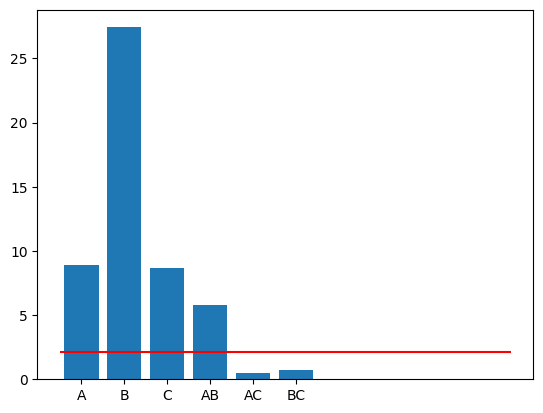

{'A': 8.86914104169913,
 'B': 27.422976324334094,
 'C': 8.665252741889956,
 'AB': 5.8108165445615,
 'AC': 0.5097207495229386,
 'BC': 0.713609049332114}

In [71]:
names = ['A','B','C','AB','AC','BC']

efectos = {}
for name in names:
  efecto = (data['Rendimientos'][data[name]==1].sum()-data['Rendimientos'][data[name]==-1].sum())/(2**4)
  efectos[name] = efecto

estimacion_estandar_error = (anova_result['mean_sq'].Residual/(2**3))**0.5

efecto_standarizado = {}

for name in efectos.items():
  efecto_standarizado[name[0]]=name[1]/estimacion_estandar_error

bars = 2.1199053

#plt.plot(efecto_standarizado)

names = list(efecto_standarizado.keys())
values = list(efecto_standarizado.values())

values = [abs(result) for result in values]

plt.bar(range(len(efecto_standarizado)), values, tick_label=names)
plt.hlines(xmin=-0.5, xmax=10, y = bars, color='red')
plt.show()
efecto_standarizado

# **11. Encontrando el óptimo**

In [72]:
modelo4.params

Intercept    30.4375
A             5.4375
B            16.8125
C             5.3125
A:B           3.5625
A:C           0.3125
B:C           0.4375
dtype: float64

In [73]:
#!pip install texttable &>/dev/null
#from texttable import Texttable

t1 = Texttable()
b0, A, B, C, AB, AC, BC= modelo4.params
# Tabla Resumen

t1.add_rows([['Parametro = bi','valor de bi para el modelo 1' ],
           ['b0',	b0],
           ['A',	A ],
           ['B',	B ],
           ['C',	C ],
           ['AB',AB ],
           ['AC',AC ],
           ['BC',BC ]
           ])
print(t1.draw())

+----------------+------------------------------+
| Parametro = bi | valor de bi para el modelo 1 |
+================+==============================+
| b0             | 30.438                       |
+----------------+------------------------------+
| A              | 5.438                        |
+----------------+------------------------------+
| B              | 16.813                       |
+----------------+------------------------------+
| C              | 5.312                        |
+----------------+------------------------------+
| AB             | 3.562                        |
+----------------+------------------------------+
| AC             | 0.313                        |
+----------------+------------------------------+
| BC             | 0.437                        |
+----------------+------------------------------+


In [74]:
from scipy.optimize import minimize

# Define la función que deseas maximizar se antepone el signo (-)
def funcion(x):
    return -(b0+A*x[0] + B*x[1] + C*x[2] + AB*x[0]*x[1] + AC*x[0]*x[2] + BC*x[1]*x[2])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2]

# Definir las restricciones de límite para x
restricciones = [(-1, 1), (-1, 1), (-1, 1)]

# Suprimir la Bida de la optimización
res = minimize(funcion, [0, 0, 0], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print("x:", [2*round(i)-1 for i in res.x])
print("Valor Máximo:", -res.fun)  # Como minimizamos el negativo de la función


Resultado óptimo:
x: [1, 1, 1]
Valor Máximo: 62.31249999999011


In [75]:
from scipy.optimize import minimize

# Define la función que deseas maximizar se antepone el signo (-)
def funcion(x):
    return (b0+A*x[0] + B*x[1] + C*x[2] + AB*x[0]*x[1] + AC*x[0]*x[2] + BC*x[1]*x[2])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2]

# Definir las restricciones de límite para x
restricciones = [(-1, 1), (-1, 1), (-1, 1)]

# Suprimir la Bida de la optimización
res = minimize(funcion, [0, 0, 0], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print("x:", [2*round(i)-1 for i in res.x])
print("Valor Minimo:", res.fun)  # Como minimizamos el negativo de la función

Resultado óptimo:
x: [-1, -1, -1]
Valor Minimo: 30.43750000000001
